# **지도 학습(supervised learning)**
> 훈련하기 위해서는 데이터와 정답이 필요한 학습이다. 지도학습에서는 **데이터와 정답**을 **입력과 타겟**이라고 하며,  
이렇게 두 개를 **훈련 데이터**라고 부른다.

```
       훈련데이터
-----------------------
      입력         타겟
----------------  -----
길이특성 무게특성
--------  -------
[[  25.4  242. ]   [1,  
 [  26.3  290. ]    1,  
 [  26.5  340. ]    1,  
 [  29.0  363. ]    1,  
 [  29.0  430. ]    1,  
 [  29.7  450. ]    1,  
 [  29.7  500. ]    1,  
 [  30.0  390. ]    1,  
 ...                ...  
 [  15.0    19.9]]  0]  
```

> 지도 학습은 정답(타겟)이 있으니 알고리즘이 정답을 맞히는 것을 학습한다.  
예를 들어 위의 예제처럼 입력한 데이터가 도미인지 빙어인지 맞추는 것이다.

---

## 머신러닝
> ### ㄴ지도 학습
>> ### ㄴ***k-최근접 이웃***
> ### ㄴ비지도 학습
> ### ㄴ강화 학습


---

> 도미와 빙어의 데이터와 타겟을 주고 훈련한 뒤, 같은 데이터로만 테스트한다면 정답이 있기 때문에 당연히 정확도는 100%이다.  
하지만 제대로 평가하기 위해서는 훈련된 데이터와 평가할 데이터가 각각 달라야 한다.  
이렇듯 평가에 사용하는 데이터를 테스트 세트, 훈련에 사용되는 데이터를 훈련 세트라고 부른다.

> 도미와 빙어의 데이터를 하나로 합쳤을 때 하나의 생선 데이터를 **샘플**이라고 부른다.  
이 데이터중 첫 35개를 훈련 세트, 나머지 14개를 테스트 세트로 설정한다.  
* 훈련 세트는 클 수록 좋다. 테스트 세트를 제외한 모든 데이터를 훈련 세트로 사용한다.
* 일반적으로 전체 데이터에서 20~30%정도를 테스트 세트로 사용한다.

In [6]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [7]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

> 사이킷런, KNeighborsClassifier 모델 객체 생성

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

> 훈련 세트와 테스트 세트 선별

In [9]:
#훈련 세트로 입력 데이터 중 첫 35개 선택
train_input = fish_data[:35]
#훈련 세트로 타겟 중 첫 35개 선택
train_target = fish_target[:35]
#테스트 세트로 입력 데이터 중 35번째 부터 나머지까지 선택
test_input = fish_data[35:]
#테스트 세트로 타겟 중 35번째 부터 나머지까지 선택
test_target = fish_target[35:]

> 35개 샘플을 훈련 세트로 선택하고 나머지 14개 샘플을 테스트 세트로 선택하여 훈련 후 정확도 평가

In [10]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

> 훈련 데이터에서 훈련 세트와 테스트 세트로 분리하였지만 훈련 세트에는 빙어가 한 마리도 없으니  
올바르게 분류할 수 없게 된다. 즉, 잘못된 훈련 데이터가 된 것이다.  
훈련 세트와 테스트 세트를 나눌 때에는 **도미와 빙어가 골고루 섞이게 만들어야 한다.**  
  
> 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않고 한쪽으로 치우쳐 있거나  
특정 종류의 생플이 과도하게 많은 것을  **샘플링 편향(sampling bias[바이어스])**라고 한다.  
이를 해결하기 위해서 넘파이 라이브러리를 사용해보자.

## **넘파이**
> 파이썬의 대표적인 배열 라이브러리이다.  
고차원 리스트를 표현할 때 직접 코딩을 하면 불편하기 때문에 이를 쉽게 제어할 수 있는 간편한 도구들을 넘파이에서 많이 제공한다.  
> 넘파이 배열은 C, C++과 같은 저수준 언어로 개발되어서 빠르다.

In [12]:
import numpy as np

### **numpy.array()**
* 파이썬 list를 numpy array로 변경시켜준다.

In [14]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

input_arr

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


### **shape**
* 행과 열의 개수를 나타내 준다.  
* 샘플 수, 특성 수

In [16]:
print(input_arr.shape)
print(target_arr.shape)

(49, 2)
(49,)


> 훈련 세트와 테스트 세트는 인덱스를 공유하기 때문에 인덱스를 랜덤하게 섞은 후 각 배열에 적용시킨다.

In [17]:
#난수의 기준이 되는 seed값을 통해서 랜덤한 숫자를 가져오기 때문에 고정시키면 항상 같은 결과가 나온다.
np.random.seed(42) ##################강사와 수강생 간 같은 결과를 비교하기 위해서 42로 고정시켜준다.
#0~48까지 1씩 증가하는 값을 index에 넣어준다.
index = np.arange(49)
#shuffle을 사용해서 인덱스를 섞어준다.
np.random.shuffle(index)

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


### **배열 인덱싱**
***numpy array[[샘플인덱스1, 샘플인덱스2, ...]]***  
* 전달한 인덱스의 샘플을 가져온다.

In [18]:
input_arr[[1, 3, 4]]

array([[ 26.3, 290. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

> 랜덤한 인덱스 번호로 훈련 세트를 만든다.

In [20]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0]) #13번 샘플 데이터와 0번 훈련 데이터가 일치하는 것으로 보아 잘 섞여 있다.

[ 32. 340.] [ 32. 340.]


> 랜덤한 인덱스 번호로 테스트 세트를 만든다.

In [26]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

print(input_arr[37], test_input[0]) #14개의 테스트 데이터 중 첫번째 데이터 또한 잘 섞여 있다.

[10.6  7. ] [10.6  7. ]


### **행과 열 슬라이싱**
***arr[행,열]***  
* arr[:, 0]은 전체 행에서 첫번째 열을 의미한다.  
* arr[:, 1]은 전체 행에서 두번째 열을 의미한다.

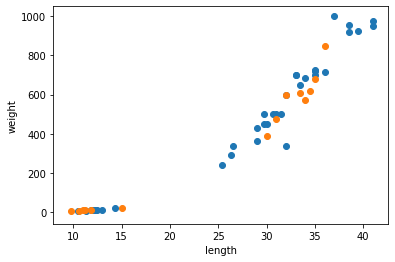

In [28]:
import matplotlib.pyplot as plt

#첫번째 특성(0) : 길이
#두번째 특성(1) : 무게
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> 훈련 세트로 모델 훈련

In [32]:
kn = kn.fit(train_input, train_target)

> 테스트 세트로 예측

In [30]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

> 실제 테스트 데이터

In [31]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

> 정확도 출력

In [33]:
kn.score(test_input, test_target)

1.0